<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-example" data-toc-modified-id="Dataset-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset example</a></span></li></ul></div>

# Dataset example

In [14]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
from dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print('Pokemon dataset')
pokemon = Dataset('../data/pokemon.csv.gz')
pokemon.set_target('Legendary')
pokemon.describe()
pokemon.summary()

Pokemon dataset

Available types: [dtype('float64') dtype('O')]
12 Features
4 categorical features
8 numerical features
1 categorical features with NAs
0 numerical features with NAs
11 Complete features
--
Target: Legendary (bool)
'Legendary'
  Min.: 0.0000
  1stQ: 0.0000
  Med.: 0.0000
  Mean: 0.0813
  3rdQ: 0.0000
  Max.: 1.0000

Features Summary:
'#'         : float64    Min.(1.0) 1stQ(184.) Med.(364.) Mean(362.) 3rdQ(539.) Max.(721.)
'Name'      : object     800 categs. 'Bulbasaur'(1, 0.0013) 'Ivysaur'(1, 0.0013) 'Venusaur'(1, 0.0013) 'VenusaurMega Venusaur'(1, 0.0013) 'Charmander'(1, 0.0013) ...
'Type 1'    : object     18 categs. 'Grass'(112, 0.1400) 'Fire'(98, 0.1225) 'Water'(70, 0.0875) 'Bug'(69, 0.0862) 'Normal'(57, 0.0712) ...
'Type 2'    : object     18 categs. 'Poison'(97, 0.2343) 'nan'(35, 0.0845) 'Flying'(34, 0.0821) 'Dragon'(33, 0.0797) 'Ground'(26, 0.0628) ...
'Total'     : float64    Min.(180.) 1stQ(330.) Med.(450.) Mean(435.) 3rdQ(515.) Max.(780.)
'HP'        : float6

In [7]:
hr = Dataset('/Users/renero/Downloads/hr-analytics.zip')
hr.set_target('left')
hr.summary()
print('\n--')
print('List of skewed numerical features:')
print(hr.skewed_features())
print('\n--')
print('Converting categoricals to dummies')
hr.to_categorical(['number_project', 'time_spend_company',
                   'promotion_last_5years', 'Work_accident'])
hr.onehot_encode(hr.names('categorical'))
hr.summary()


Features Summary:
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'sales'                : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) 'support'(902, 0.0601) ...
'salary'               : object     3 categs. 'low'(7316, 0.4878) 'medium'(6446, 0.4298) 'high'(1237, 0.0825) 

--
List 

In [8]:
print('\nStepwise feature selection')
hr.keep_columns(hr.stepwise_selection()).describe()
print('\nFeatures highly correlated')
hr.drop_columns(hr.correlated()).describe()


Stepwise feature selection

Available types: [dtype('float64')]
24 Features
0 categorical features
24 numerical features
0 categorical features with NAs
0 numerical features with NAs
24 Complete features
--
Target: left (float64)
'left'
  Min.: 0.0000
  1stQ: 0.0000
  Med.: 0.0000
  Mean: 0.2381
  3rdQ: 0.0000
  Max.: 1.0000

Features highly correlated

Available types: [dtype('float64')]
23 Features
0 categorical features
23 numerical features
0 categorical features with NAs
0 numerical features with NAs
23 Complete features
--
Target: left (float64)
'left'
  Min.: 0.0000
  1stQ: 0.0000
  Med.: 0.0000
  Mean: 0.2381
  3rdQ: 0.0000
  Max.: 1.0000


[-1.00140948 -0.98830488 -1.06784728 ... -1.00191362 -1.00967756
 -0.99935922]


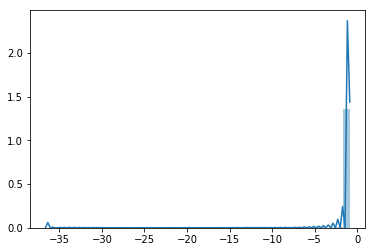

In [9]:
lof_outliers = hr.outliers()

sns.distplot(lof_outliers)
plt.show();

In [10]:
min(lof_outliers)

-36.59837842022699

In [15]:
np.where(lof_outliers == min(lof_outliers))

(array([7989]),)

In [19]:
hr.features.iloc[7989, :]

average_montly_hours         135.00
last_evaluation                0.45
satisfaction_level             0.36
number_project_2.0             1.00
number_project_3.0             0.00
number_project_4.0             0.00
number_project_5.0             0.00
number_project_6.0             0.00
number_project_7.0             0.00
time_spend_company_10.0        0.00
time_spend_company_2.0         0.00
time_spend_company_4.0         0.00
time_spend_company_5.0         0.00
time_spend_company_6.0         0.00
time_spend_company_7.0         0.00
time_spend_company_8.0         0.00
Work_accident_0.0              0.00
promotion_last_5years_0.0      1.00
sales_RandD                    0.00
sales_hr                       0.00
salary_high                    1.00
salary_low                     0.00
salary_medium                  0.00
Name: 7989, dtype: float64

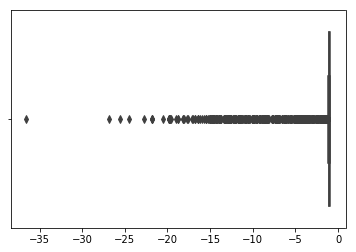

In [26]:
sns.boxplot(lof_outliers)

In [32]:
np.percentile(lof_outliers, 1)

-9.991524796067342